In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import urllib
#req = urllib.request.urlretrieve('https://covid19.who.int/WHO-COVID-19-global-data.csv',filename = 'WHO-COVID-19-global-data.csv')
class Corona:
    def __init__(self):
        self.data =  pd.read_csv('/home/arsath/100_Days_of_Code/WHO-COVID-19-global-data.csv')
        self.high_cumulative_cases      = None
        self.high_cumulative_deaths     = None
        self.overall_df                 = None
        self.countries                  = None
        to_remove = self.data[self.data.loc[:,'WHO_region'] == 'Other']
        #print(to_remove.loc[:,['Cumulative_cases','Cumulative_deaths']].max() )
        # Since it does not make much difference in our data we will remove that from our data
        #print(f'Before Removing {self.data.shape}')
        self.data.drop(index = to_remove.index,inplace=True)
        #print(self.data.dtypes)
        self.data['Date_reported'] = pd.to_datetime(self.data['Date_reported'])
        #print(self.data.dtypes)
        #print(f'After Removing {self.data.shape}')
        #print(self.data.isna().any())
        #print(self.data['Country_code'].isna().sum())
        null_values = self.data[self.data.loc[:,'Country_code'].isna()]
        self.data['Country_code'].fillna(null_values.loc[:,'Country'].str[0:2],inplace = True)
        #print(self.data['Date_reported'].agg(('min','max')))
        self.data.set_index('Country',inplace=True)
        self.overall_df = self.data.groupby(self.data.index).last() # For the purpose of getting highest cumulative cases for each country
        self.high_cumulative_cases   = self.overall_df.sort_values('Cumulative_cases',ascending = False)
        self.high_cumulative_deaths  = self.overall_df.sort_values('Cumulative_deaths',ascending = False)
        self.countries               = self.high_cumulative_cases.index[0:5]

    def cumulative_cases(self): 
        '''
        This Method plots the Overall no.of.New_Cases of top20 countries that is affected the most.
        
        Returns: Data of all the countries that are affected the most by new_cases in the order of high to low
        '''
        x = self.high_cumulative_cases.index[0:20]
        y = self.high_cumulative_cases.loc[:,'Cumulative_cases'][0:20]
        plt.figure(figsize = (12,6))
        plt.title('Countries Affected the most by Cumulative_Cases')
        high_cum_case_plt  = sns.barplot(x = x, y = y,palette = 'Blues_d')
        high_cum_case_plt.tick_params(labelrotation = 90,labelsize = 15,axis = 'x')
        high_cum_case_plt.tick_params(labelsize = 15,axis = 'y')
        plt.show()
        return self.high_cumulative_cases

    def cumulative_deaths(self):
        '''
        This Method plots the Overall no.of.Deaths of top20 countries that is affected the most.
        
        Returns: Data of all the countries that are affected the most by new_deaths in the order of high to low.
        '''
        x = self.high_cumulative_deaths.index[0:20]
        y = self.high_cumulative_deaths.loc[:,'Cumulative_deaths'][0:20]
        plt.figure(figsize  = (12,6))
        plt.title('Countries Affected the most by Cumulative_Deaths')
        high_cum_deaths_plt = sns.barplot(x = x , y = y , palette = 'Blues_d')
        high_cum_deaths_plt.tick_params(labelrotation = 90 , labelsize = 15,axis = 'x')
        high_cum_deaths_plt.tick_params(labelsize = 15 , axis = 'y')
        plt.show()
        return self.high_cumulative_deaths
    
    def avg_new_cases(self,countries = None):
        if countries is None:
            countries = self.countries 
        for country in countries:
            x = self.data.loc[country].loc[:,'Date_reported'].dt.month
            y = self.data.loc[country].loc[:,'New_cases']
            plt.figure(figsize = (12,6))
            plt.title(country)
            sns.barplot(x = x,y = y)
            plt.xlabel( 'MONTHS')
            plt.ylabel( 'AVG_NEW_CASES')
            plt.tick_params(labelsize = 15)
            plt.grid(True)
            plt.show();

    def avg_new_deaths(self,countries = None):
        if countries is None:
            countries = self.countries 
        for country in countries:
            x = self.data.loc[country].loc[:,'Date_reported'].dt.month
            y = self.data.loc[country].loc[:,'New_deaths']
            plt.figure(figsize = (12,6))
            plt.title(country)
            sns.barplot(x = x,y = y)
            plt.xlabel( 'MONTHS')
            plt.ylabel( 'AVG_NEW_DEATHS')
            plt.tick_params(labelsize = 15)
            plt.grid(True)
            plt.show();

    def most_affected_countries(self, by = 'New_cases'):
        '''
        This Method plots the line plot for the given inputs for given Y_col
        '''
        plt.figure(figsize = (12,6))
        plt.title(f'Most Affected Countries by {by}')
        for country in self.countries:
            x = self.data.loc[country].loc[:,'Date_reported'].dt.month
            y = self.data.loc[country].loc[:,by]
            sns.lineplot(x = x,y = y,label = country)
        plt.xlabel('MONTHS')
        plt.ylabel( 'AVG'+' '+by.upper())
        plt.tick_params(labelsize = 15)
        plt.grid(True)
        plt.show();
    
    def most_affected_region(self):
        median = self.overall_df.loc[:,'Cumulative_cases'].sort_values(ascending = False).median()
        return self.overall_df[self.overall_df.loc[:,'Cumulative_cases'] >= median].value_counts(subset = 'WHO_region',ascending = False)

    def world_analysis(self, by = 'New_cases'):
        plt.figure(figsize = (12,6))
        plt.title(f'world Data by {by}')
        x = self.data.loc[:,'Date_reported'].dt.month
        y = self.data.loc[:,by]
        sns.barplot(x = x , y = y)
        plt.xlabel('MONTHS')
        plt.ylabel('AVG'+' '+by.upper())
        plt.tick_params(labelsize = 15)
        plt.grid(True)
        plt.show()

    def today_data(self,by = 'New_cases'):
        today =  self.overall_df.sort_values('New_cases',ascending = False)
        plt.figure(figsize = (12,6))
        plt.title(f'world Data by {by}')
        x = today.iloc[0:10].index
        y = today.iloc[0:10].loc[:,by]
        sns.barplot(x = x , y = y)
        plt.ylabel(ylabel = 'AVG'+' '+by.upper())
        plt.tick_params(labelrotation = 90,axis = 'x')
        plt.tick_params(labelsize = 15)
        plt.grid(True)
        plt.show()
        return today.iloc[0:10].value_counts('WHO_region')
    
    

In [2]:
covid = Corona()

In [3]:
covid.most_affected_region()

WHO_region
EURO     47
AMRO     20
EMRO     18
AFRO     18
WPRO      8
SEARO     7
dtype: int64

### The Above code says that the EUROPEAN countries are highly affected by Corona disease

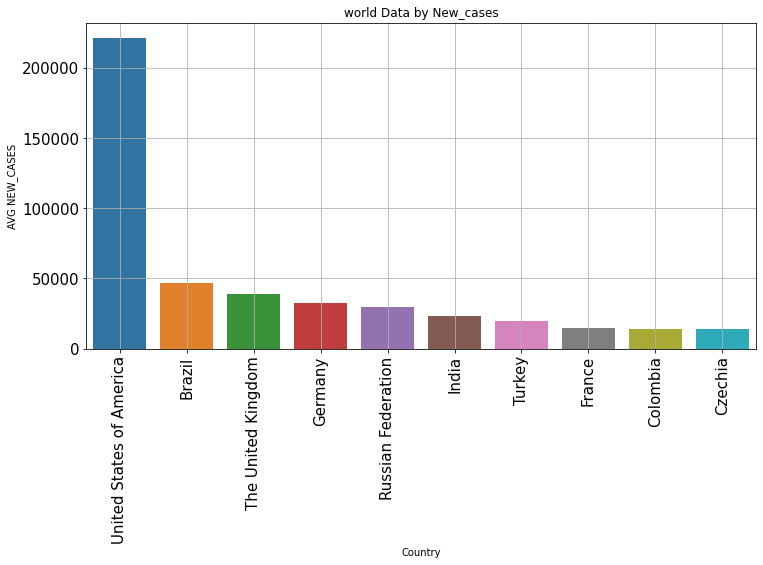

WHO_region
EURO     6
AMRO     3
SEARO    1
dtype: int64

In [4]:
covid.today_data('New_cases')

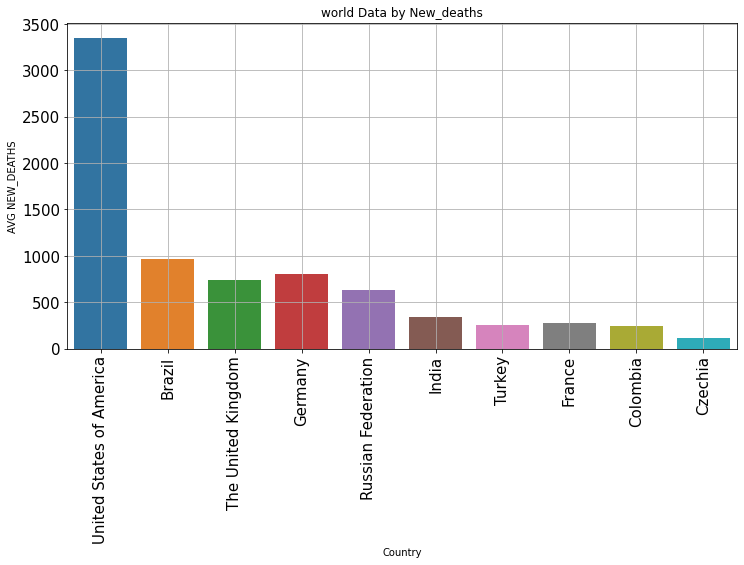

WHO_region
EURO     6
AMRO     3
SEARO    1
dtype: int64

In [5]:
covid.today_data('New_deaths')

### As of Today(25.12.2020) US is affected the most by more than 200,000 New Cases and 3300 and above New Deaths

### Comparing to US other countries are fairly doing a great job by keeping the cases below 1000

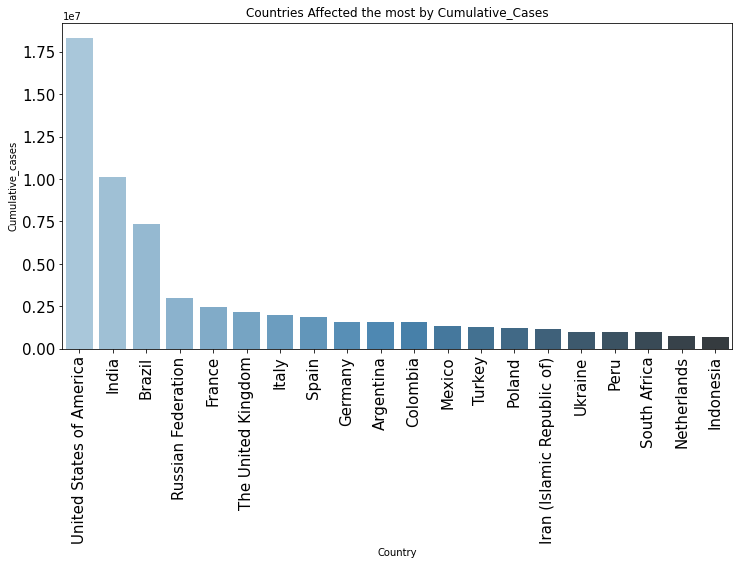

,Date_reported,Country_code,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
Country,,,,,,,
United States of America,2020-12-25,US,AMRO,221145,18311405,3347,323527
India,2020-12-25,IN,SEARO,23067,10146845,336,147092
Brazil,2020-12-25,BR,AMRO,46696,7365517,961,189220
Russian Federation,2020-12-24,RU,EURO,29935,2963688,635,53096
France,2020-12-24,FR,EURO,14836,2463379,276,61602
...,...,...,...,...,...,...,...
Nauru,2020-12-25,NR,WPRO,0,0,0,0
Cook Islands,2020-12-25,CK,WPRO,0,0,0,0
Democratic People's Republic of Korea,2020-12-25,KP,SEARO,0,0,0,0


In [6]:
covid.cumulative_cases()

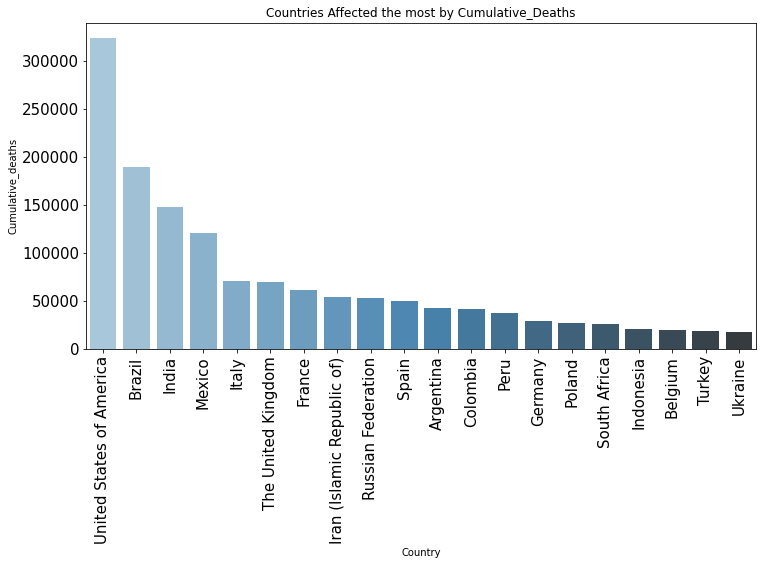

,Date_reported,Country_code,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
Country,,,,,,,
United States of America,2020-12-25,US,AMRO,221145,18311405,3347,323527
Brazil,2020-12-25,BR,AMRO,46696,7365517,961,189220
India,2020-12-25,IN,SEARO,23067,10146845,336,147092
Mexico,2020-12-25,MX,AMRO,11653,1350079,816,120311
Italy,2020-12-24,IT,EURO,13908,1991278,553,70395
...,...,...,...,...,...,...,...
Lao People's Democratic Republic,2020-12-25,LA,WPRO,0,41,0,0
Kiribati,2020-12-25,KI,WPRO,0,0,0,0
Solomon Islands,2020-12-25,SB,WPRO,0,17,0,0


In [7]:
covid.cumulative_deaths()

### Again US tops the list in Overall New Cases at a rate of 1.7 * 1o^ 7 and New Deaths at a rate of 300,000  Deaths Overall

### Though India is in  second place, by considering INDIA's population India have been contained very well

### Brazil is in the third place in overall New Cases and second place in overall deaths

### Considering other countries population like UK,Mexico, they are in the poor place as well


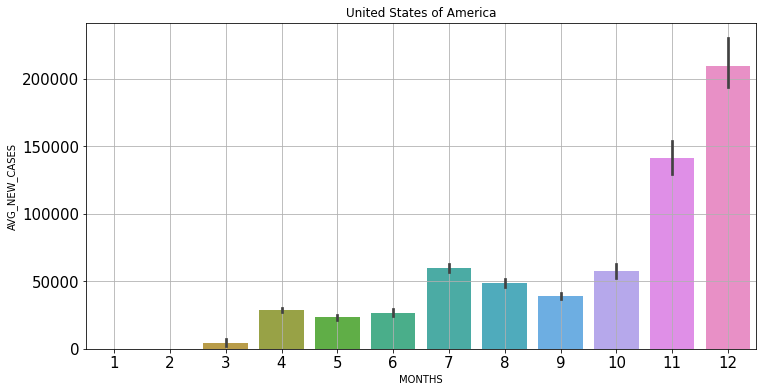

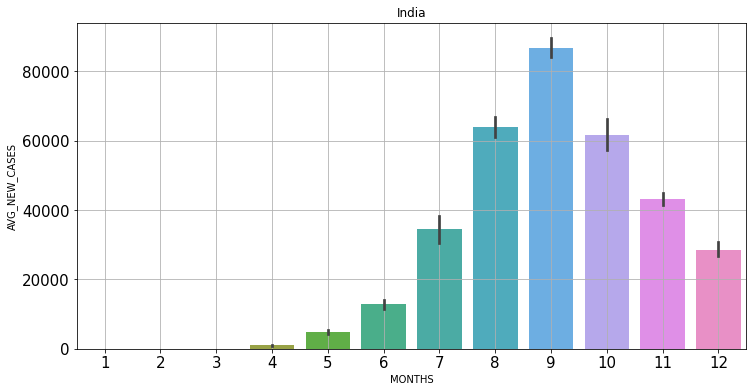

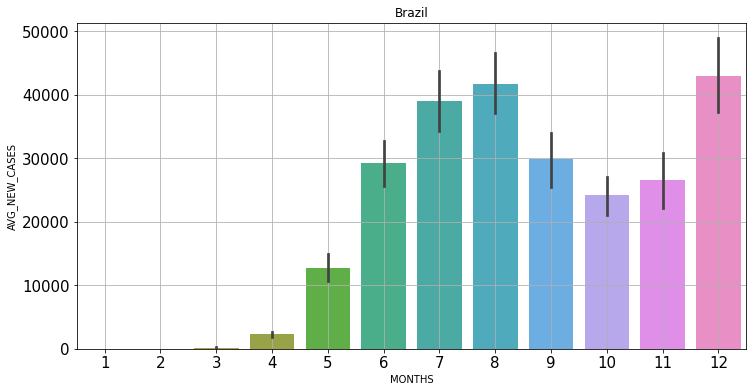

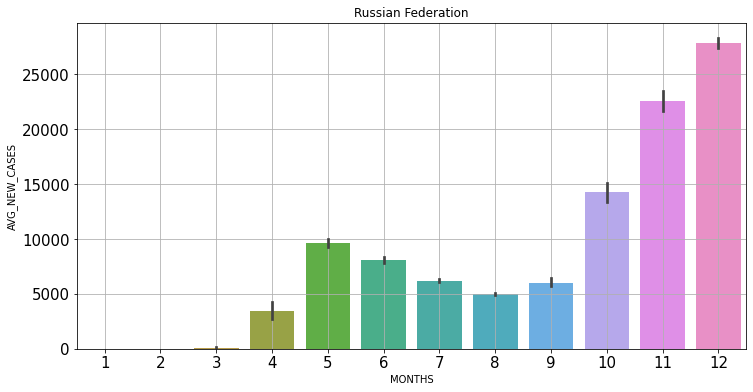

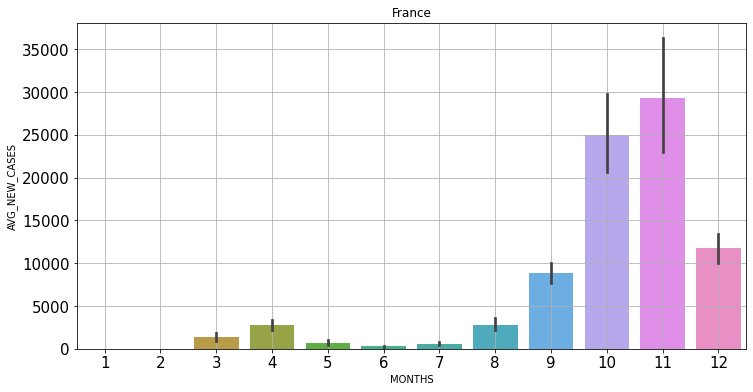

In [8]:
covid.avg_new_cases()

### The Above 2 plot shows that how disease spread over this year in top 5 highly affected countries. You can view your country as well by adding your country name in function argument

### This month(December) is the worst month for US as their New_Cases are on top of it more than any other month. We know US  has so many christian's don't know how they are going to celebrate christamas and New year, but for sure this not the NewYear that they wanted.

### Same as with Russia and Brazil their new cases are higher this month more than any other month.

### India has done well keep cases down, as you can see India has seen it's peek in the month of September and then the cases are droping rapidly which is a good sign for India



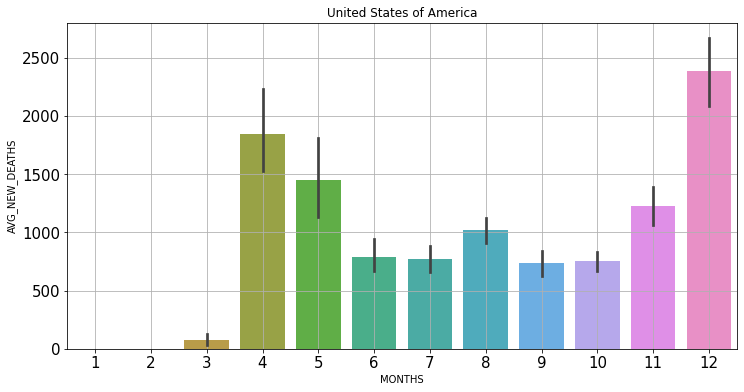

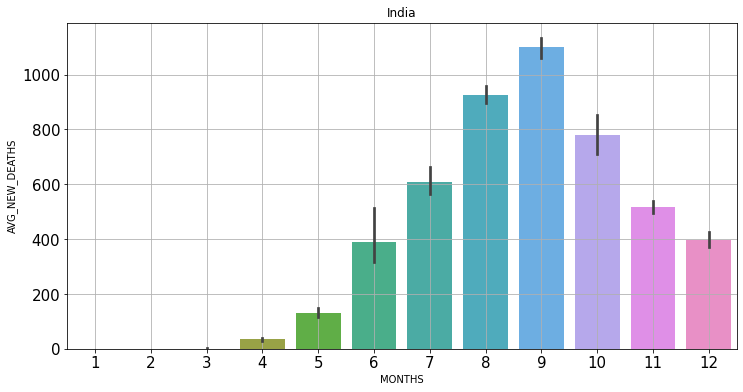

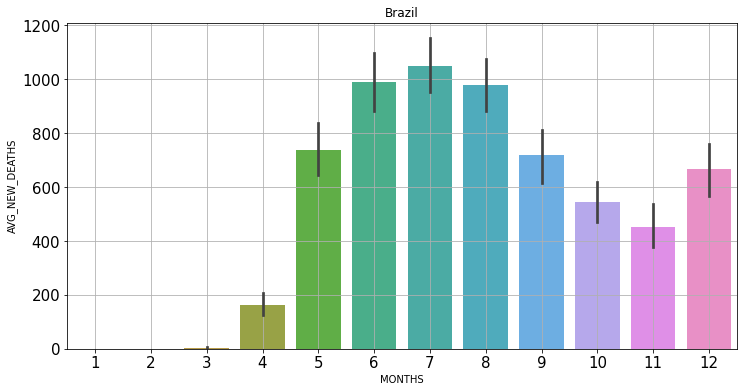

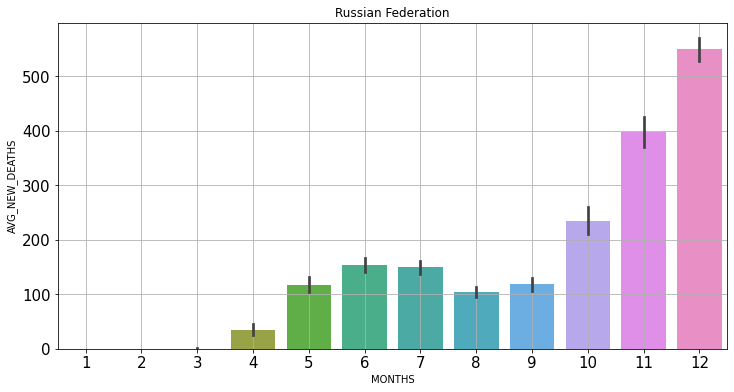

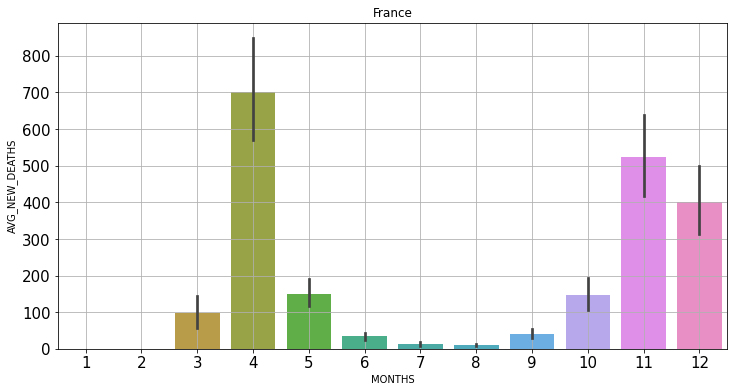

In [9]:
covid.avg_new_deaths()

#### If we talk about Corona the first country that comes on to our mind is US. On Average more than 2500 people are dying in US. 

#### India's New Case and New Death's plot is pretty same which means the more no.of.cases the more no.of.Deaths. 


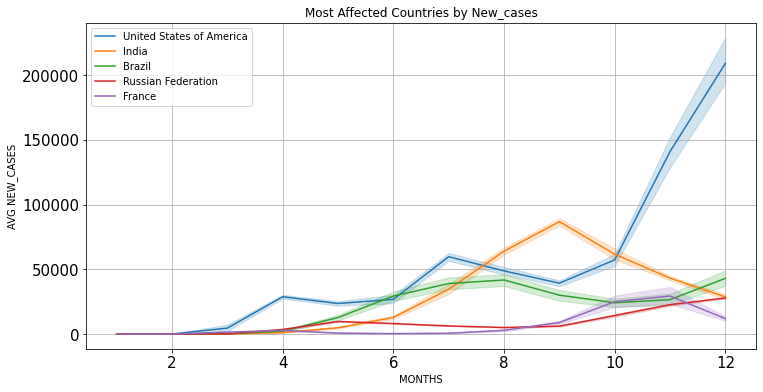

In [10]:
covid.most_affected_countries()

#### While all the countries are fighting to let their cases go down below 50,000 US is the only country that goes more than 2,00,000  in New Cases.

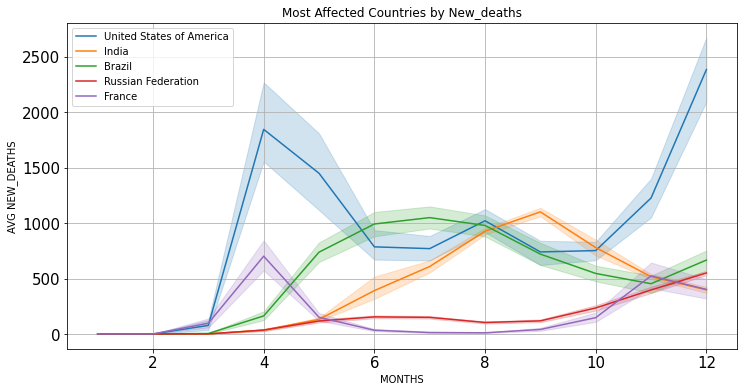

In [11]:
covid.most_affected_countries(by = 'New_deaths')

### Through this plot we can see that how countries have been progressed over the years by New Deaths on each month on average in single graph


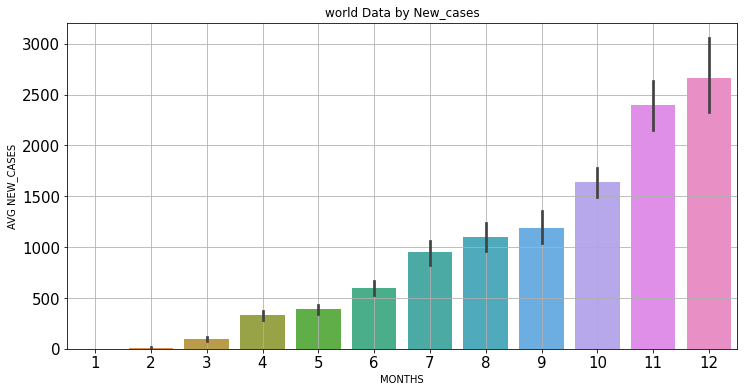

In [12]:
covid.world_analysis()

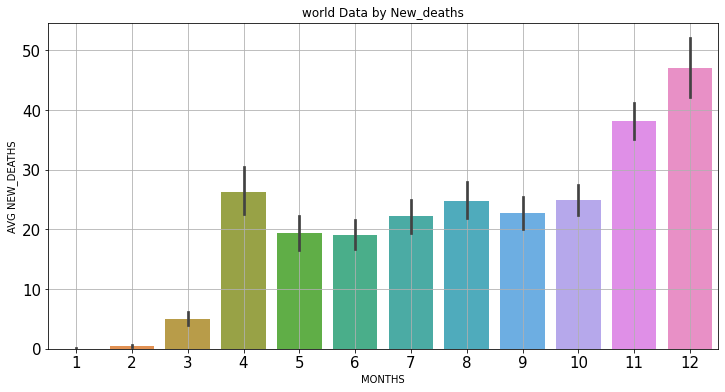

In [13]:
covid.world_analysis(by = 'New_deaths')

### The above 2 plots shows that the No.of.Cases and No.of.Deaths are constantly rising and there is no sign of drop in cases and deaths 